## Criação automática de subsídios

Estrutura
- Ação no estado de {**nome do estado**} ({sigla do estado})
- No Estado de {**nome do estado**}, destacamos os seguintes instrumentos de transferência voluntária afeto ao enfrentamento à violência contra as mulheres: 

- Convênios, contratos de repasse (todos que existirem)

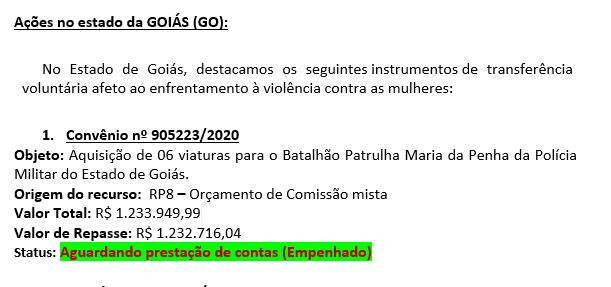

## 1.Import Libraries and Data

In [1]:
import datetime
from num2words import num2words

# Base de dados
import pandas as pd
import numpy as np

# Documento
from docx import Document
from docx.shared import Inches
from docx.enum.style import WD_STYLE_TYPE
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt, RGBColor, Inches

## 2. Sharepoint Connect

Conseguir conectar ao sharepoint para não ter que baixar a planilha manualmente.

In [2]:
data_convenios = pd.read_excel('INSTRUMENTOS DEV.SNPM.xlsx', sheet_name='Convênios 2018.2022').loc[:100, :]
data_act = pd.read_excel('INSTRUMENTOS DEV.SNPM.xlsx', sheet_name='ACT 2018-2022')
data_contratos = pd.read_excel('INSTRUMENTOS DEV.SNPM.xlsx', sheet_name='Contratos de Repasse.2018.2022').loc[:30, :]
data_teds = pd.read_excel('INSTRUMENTOS DEV.SNPM.xlsx', sheet_name='TEDS 2018.2022').loc[:4, :]

### Funções e variáveis auxiliares

#### Nome do mês por extenso

In [3]:
month_name = {'1': 'janeiro', '2': 'fevereiro', '3': 'março', '4': 'abril', '5': 'maio', '6': 'junho', '7': 'julho', '8': 'agosto', '9': 'setembro', '10': 'outubro', '11': 'novembro', '12': 'dezembro'}

#### Nome da UF por extenso

In [4]:
estados = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

#### Número por Extenso

In [5]:
from num2words import num2words

def number_to_long_number(number_p):
    if number_p.find('.')!=-1:
        number_p = number_p.split('.')
        number_p1 = int(number_p[0].replace('.',''))
        number_p2 = int(number_p[1])
    else:
        number_p1 = int(number_p.replace('.',''))
        number_p2 = 0    
    if number_p1 == 1:
        aux1 = ' real'
    else:
        aux1 = ' reais'  
    if number_p2 == 1:
        aux2 = ' centavo'
    else:
        aux2 = ' centavos'
    text1 = ''
    if number_p1 > 0:
        text1 = num2words(number_p1,lang='pt_BR') + str(aux1)
    else:
        text1 = ''
    if number_p2 > 0:
        text2 = num2words(number_p2,lang='pt_BR') + str(aux2) 
    else: 
        text2 = ''
    if (number_p1 > 0 and number_p2 > 0):
        result = text1 + ' e ' + text2
    else:
        result = text1 + text2
    return result

In [6]:
print(number_to_long_number('12.5'))

doze reais e cinco centavos


## 3. Geração do documento

In [28]:
texto = '''Partido Kafa
Emenda sd'''
print(texto.split('\n'))

['Partido Kafa', 'Emenda sd']


In [27]:
def gerar_subsidio_uf(uf):
    doc_subsidio = Document()
    style = doc_subsidio.styles['Normal']
    font = style.font
    
    font.name = 'Calibri'
    font.size = Pt(12)
    
    # Base de dados
    data_temp_conv = data_convenios.loc[data_convenios['UF'] == uf, :]
    data_temp_ct = data_contratos.loc[data_contratos['UF'] == uf, :]
    data_temp_ted = data_teds.loc[data_teds['UF'] == uf, :]
    data_temp_act = data_act.loc[data_act['UF'] == uf, :]
    
    # Variáveis
    vt_conv = f'{data_temp_conv["VALOR DO CONVÊNIO"].sum():.2f}'
    vt_conv_text = num2words(int(data_temp_conv["VALOR DO CONVÊNIO"].sum()), lang='pt-br')
    vr_conv = f'{data_temp_conv["VALOR DE REPASSE"].sum():.2f}'
    
    vt_cont = f'{data_temp_ct["VALOR TOTAL DO CONVÊNIO"].sum():.2f}'
    vr_cont = f'{data_temp_ct["VALOR DE REPASSE"].sum():.2f}'
    
    vt_ted = f'{data_temp_ted["VALOR TOTAL DO CONVÊNIO"].sum():.2f}'
    vr_ted = f'{data_temp_ted["VALOR DE REPASSE"].sum():.2f}'
    
    # Cabeçalho
    doc_subsidio.add_picture('imagens\governo_federal_logo.png', width=Inches(0.8), height=Inches(0.8))
    last_paragraph = doc_subsidio.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    cabecalho = doc_subsidio.add_paragraph()
    cabecalho.alignment = WD_ALIGN_PARAGRAPH.CENTER
    p = cabecalho.add_run(f'MINISTÉRIO DA MULHER, DA FAMÍLIA E DOS DIREITOS HUMANOS (MMFDH) \nSECRETARIA NACIONAL DE POLÍTICAS PARA MULHERES (SNPM) \n \n{estados[uf].upper()}') 
    p.bold = True
    z = cabecalho.add_run('\nAÇÕES NO ESTADO')
    z.bold = True
    z.underline = True
    doc_subsidio.add_paragraph()
    
    # Cabeçalho 2
    dev_nome = doc_subsidio.add_table(rows=1, cols=1)
    
    data_criacao = datetime.date.today()
    introducao = doc_subsidio.add_paragraph(f'No Estado de {estados[uf].capitalize()}, em {data_criacao.day} de {month_name[str(data_criacao.month)]} de {data_criacao.year}, destacamos os seguintes instrumentos de transferência voluntária afetos ao enfrentamento à violência contra as mulheres.')
    introducao.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
    
    # Convênios
    if data_temp_conv.shape[0] > 0:
        for c, _ in enumerate(data_temp_conv.values):
            linha = data_temp_conv.iloc[c]
            vr = f'{linha["VALOR DE REPASSE"]:.2f}'
            vt = f'{linha["VALOR DO CONVÊNIO"]:.2f}' 
            
            nome = 'Convênio'
            if linha['INSTRUMENTO'] == 'TERMO DE FOMENTO':
                nome = 'Termo de Fomento'
            
            convenios_texto = doc_subsidio.add_paragraph(style='List Number')
            convenio_numero = convenios_texto.add_run(f'{nome} nº {linha["Nº PLATAFORMA +BRASIL"]}\n')
            convenio_numero.bold = True
            convenio_numero.underline = True
            convenio_l = convenios_texto.add_run(f'Objeto: ')
            convenio_l.bold = True
            convenios_texto.add_run(f'{linha["OBJETO"]}')
            if linha['OBJETO'][-1] != '.':
                convenios_texto.add_run('.')
            
            convenio_l = convenios_texto.add_run('\nOrigem do recurso: ')
            convenio_l.bold = True
            convenios_texto.add_run(f'{linha["ORIGEM DO RECURSO"]}, ')
            
            #if linha['ORIGEM DO RECURSO'] == 'RP6':
            #    teste = linha['EMENDA'].split()
            #    print(teste)
            #    convenios_texto.add_run(f'Emenda Parlamentar de autoria do(a) Deputado(a) Federal.')
            #else:
            #    convenios_texto.add_run(f'{linha["EMENDA"]}.')
            
            convenios_texto.add_run(
            f'Emenda: {linha["EMENDA"]}')
            doc_subsidio.add_paragraph()
            
            convenio_l = convenios_texto.add_run('\nValor total: ')
            convenio_l.bold = True
            convenios_texto.add_run(f'R$ {vt.replace(".", ",")}.')
            
            convenio_l = convenios_texto.add_run('\nValor de repasse: ')
            convenio_l.bold = True
            convenios_texto.add_run(f'R$ {vr.replace(".", ",")}.')
            
            convenio_l = convenios_texto.add_run('\nStatus: ')
            convenio_l.bold = True
            convenios_texto.add_run(f'{linha["FASE"].strip()}.')

    # Contratos de Repasse
    if data_temp_ct.shape[0] > 0:
        for c, _ in enumerate(data_temp_ct.values):
            linha = data_temp_ct.iloc[c]
            vr = f'{linha["VALOR DE REPASSE"]:.2f}'
            vt = f'{linha["VALOR TOTAL DO CONVÊNIO"]:.2f}' 
            
            doc_subsidio.add_paragraph(
                f'''Contrato de Repasse n° {linha["CONVÊNIO SICONV"]}\nObjeto: {linha["OBJETO"]} \nOrigem do recurso: {linha["ORIGEM DO RECURSO"]}\nEmenda: {linha["AUTOR EMENDA (Partido/UF)"]} \nValor Total: R$ {vt.replace(".", ",")} \nValor Total de Repasse: R$ {vr.replace(".", ",")} \nStatus: {linha['SITUAÇÃO'].strip()}.''', style='List Number'
            )
            doc_subsidio.add_paragraph()

    # TEDs
    if data_temp_ted.shape[0] > 0:
        for c, _ in enumerate(data_temp_ted.values):
            linha = data_temp_ted.iloc[c]
            vr = f'{linha["VALOR DE REPASSE"]:.2f}'
            vt = f'{linha["VALOR TOTAL DO CONVÊNIO"]:.2f}' 
            
            doc_subsidio.add_paragraph(
                f'''TED n° {linha["PROPOSTA SICONV"]}\nObjeto: {linha["OBJETO"]} \nOrigem do recurso: \nValor Total: R$ {vt.replace(".", ",")}\nEmenda: {linha["AUTOR EMENDA (Partido/UF)"]} \nValor Total de Repasse: R$ {vr.replace(".", ",")} \nStatus: {str(linha['SITUAÇÃO']).strip()}.''', style='List Number'
            )
            doc_subsidio.add_paragraph()

    # ACT    
    if data_temp_act.shape[0] > 0:
        for c, _ in enumerate(data_temp_act.values):
            linha = data_temp_act.iloc[c]
            doc_subsidio.add_paragraph(
                f'ACT n° SEI {linha["Nº PROCESSO SEI"]}\nObjeto: {linha["OBJETO"]} \nOrigem do recurso: \nValor Total: não há transferência de recursos. \nValor Total de Repasse: não há transferência de recursos. \nStatus: Em execução.', style= 'List Number')
            doc_subsidio.add_paragraph()
    
    # Finalização
    doc_subsidio.add_paragraph('Permanecemos à disposição para esclarecimentos adicionais.')

    # Salvamento do arquivo
    doc_subsidio.save(f'{uf.upper()}_subsidio.docx')

In [29]:
uf = 'DF'
gerar_subsidio_uf('DF')